In [1]:
import os
import numpy as np
import pandas as pd
import nitools as nt
import nibabel as nb
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

from pathlib import Path
from SUITPy import flatmap

import selective_recruitment.plotting as plotting
import selective_recruitment.recruite_ana as ra
import selective_recruitment.globals as gl
import selective_recruitment.scripts.script_prep_sc as ss
import selective_recruitment.scripts.script_roi_pairs_IBC as rp


from statsmodels.stats.anova import AnovaRM # perform F test
import warnings

In [2]:
# setting working directory 
# wkdir = '/Volumes/diedrichsen_data$/data/Cerebellum/Demand/selective_recruit'
langdir = 'A:\data\Cerebellum\Language'
if not Path(langdir).exists():
    langdir = '/cifs/diedrichsen/data/Cerebellum/Language/'

In [3]:
label_dict={'rest':'rest',
            'consonant_string': 'consonant', 
            'pseudoword_list':'pseudoword',
            'jabberwocky':'jabber',
            'word_list':'word',
            'simple_sentence':'simple_sen',
            'complex_sentence': 'complex_sen',
            'probe':'probe'}

In [4]:
# dataframe cleanup function (averages across halves and removes probe)
def df_clean(dataframe):
    # dataframe_noprob = dataframe[dataframe['cond_name'] != 'probe']
    dataframe_avaraged = dataframe.groupby(['sn', 'cond_name']).mean()
    dataframe_final = dataframe_avaraged.reset_index()

    return dataframe_final

In [5]:
# D = ra.get_summary(dataset = "IBC", 
#                 ses_id = 'ses-mathlang', 
#                 type = "CondHalf", 
#                 cerebellum_roi = None, 
#                 cortex_roi = None,
#                 add_rest = True)
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(langdir + '/IBC/ROI_all_mathlang.tsv',sep='\t')

In [16]:
df_path = os.path.join(langdir, 'IBC', "ROI_all_mathlang.tsv")
df = pd.read_csv(df_path, sep="\t")
dataframe_avaraged = df.groupby(['sn', 'cond_name']).mean()
dataframe_final = dataframe_avaraged.reset_index()
condition_df = df[df['cond_name'] == 'wordlist_auditory']
print(condition_df['Y'].mean())
# plotting.make_scatterplot(dataframe_final,split='cond_name', markers= True, labels= label_dict)

-0.018939425327235287


/tmp/ipykernel_7020/196769652.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_avaraged = df.groupby(['sn', 'cond_name']).mean()


In [12]:
# D = ra.get_summary(dataset = "IBC", 
#                 ses_id = 'ses-lyon2', 
#                 type = "CondHalf", 
#                 cerebellum_roi = None, 
#                 cortex_roi = None,
#                 add_rest = True)
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(langdir + '/IBC/ROI_all_lyon2.tsv',sep='\t')

In [14]:
df_path = os.path.join(langdir, 'IBC', "ROI_all_lyon2.tsv")
df = pd.read_csv(df_path, sep="\t")
dataframe_avaraged = df.groupby(['sn', 'cond_name']).mean()
dataframe_final = dataframe_avaraged.reset_index()
condition_df = df[df['cond_name'] == 'random_string']
print(condition_df['Y'].mean())

0.005397230007177674


/tmp/ipykernel_7020/3422500182.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_avaraged = df.groupby(['sn', 'cond_name']).mean()


In [17]:
# D = ra.get_summary(dataset = "MDTB", 
#                 ses_id = 'ses-s2', 
#                 type = "CondAll", 
#                 cerebellum_roi = None, 
#                 cortex_roi = None,
#                 add_rest = True)
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(langdir + '/IBC/ROI_all_MDTB-S2.tsv',sep='\t')

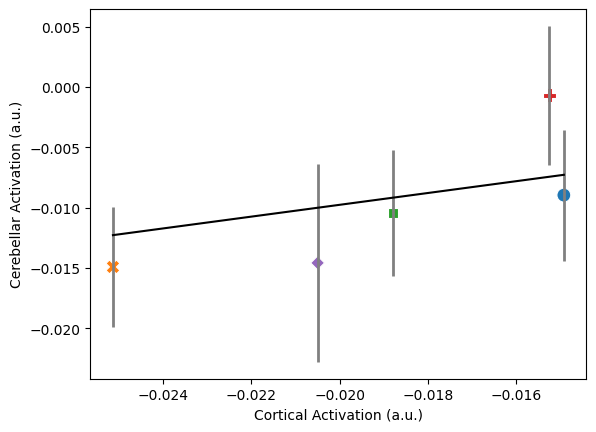

In [3]:
df_path = os.path.join(langdir, 'IBC', "ROI_all_MDTB-S2.tsv")
df = pd.read_csv(df_path, sep="\t")
conditions = ['Prediction','PredictViol','PredictScram','VerbGen','WordRead']
df_filtered = df[df['cond_name'].isin(conditions)]
plotting.make_scatterplot(df_filtered,split='cond_name', markers= True)

# Across whole

In [7]:
# D = ra.get_summary(dataset = "IBC", 
#                 ses_id = 'ses-rsvplanguage', 
#                 type = "CondHalf", 
#                 cerebellum_roi = None, 
#                 cortex_roi = None,
#                 add_rest = True)
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(langdir + '/IBC/whole/ROI_all.tsv',sep='\t')

/tmp/ipykernel_8090/3610494310.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_avaraged = dataframe.groupby(['sn', 'cond_name']).mean()


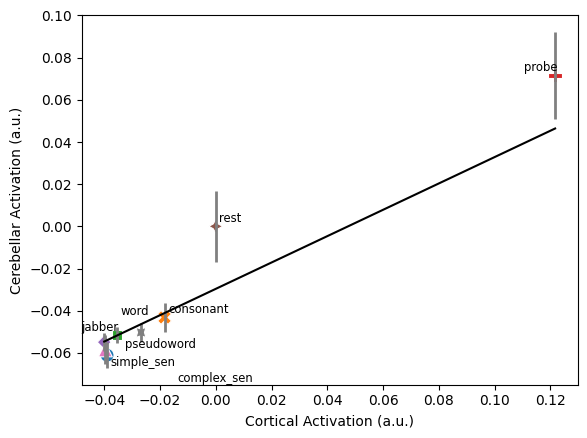

In [8]:
df_path = os.path.join(langdir, 'IBC/whole', "ROI_all.tsv")
df = pd.read_csv(df_path, sep="\t")
df1= df_clean(dataframe= df)

plotting.make_scatterplot(df1,split='cond_name', markers= True, labels= label_dict)

In [9]:
# need to pass 
print(AnovaRM(data=df1[df1.cond_name!='rest'], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
cond_name  2.6717 6.0000 66.0000 0.0221



# Language ROI (Nettekoven S1-S4). Connectivity weights trained on MDTB and applied to cereballar probabilistic parcellation

In [10]:
# D = ra.get_summary(dataset = "IBC", 
#                 ses_id = 'ses-rsvplanguage', 
#                 type = "CondHalf", 
#                 cerebellum_roi = 'tpl-SUIT/atl-language(S1-S4)_NettekovenSym68c32_space-SUIT', 
#                 cortex_roi = 'tpl-fs32k/language(S1-S4)_NettekovenSym68c32.32k',
#                 add_rest = True)
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(langdir + '/IBC/ROI/ROI_nettekoven(S1-S4).tsv',sep='\t')

/tmp/ipykernel_8090/3610494310.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_avaraged = dataframe.groupby(['sn', 'cond_name']).mean()


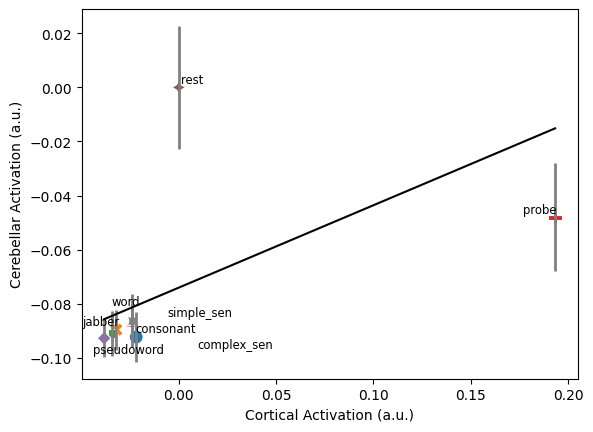

In [11]:
df_path = os.path.join(langdir, 'IBC/roi', "ROI_nettekoven(S1-S4).tsv")
df = pd.read_csv(df_path, sep="\t")
df1= df_clean(dataframe= df)

plotting.make_scatterplot(df1,split='cond_name', markers= True, labels= label_dict)

In [12]:
# need to pass 
print(AnovaRM(data=df1[df1.cond_name!='rest'], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
cond_name  5.2530 6.0000 66.0000 0.0002



# MD ROI (Nettekoven D1-D4). Connectivity weights trained on MDTB and applied to cereballar probabilistic parcellation

In [13]:
# D = ra.get_summary(dataset = "IBC", 
#                 ses_id = 'ses-rsvplanguage', 
#                 type = "CondHalf", 
#                 cerebellum_roi = 'tpl-SUIT/atl-md(D1-D4)_NettekovenSym68c32_space-SUIT', 
#                 cortex_roi = 'tpl-fs32k/md(D1-D4)_NettekovenSym68c32.32k',
#                 add_rest = True)
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(langdir + '/IBC/ROI/ROI_nettekoven(D1-D4).tsv',sep='\t')

/tmp/ipykernel_8090/3610494310.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_avaraged = dataframe.groupby(['sn', 'cond_name']).mean()


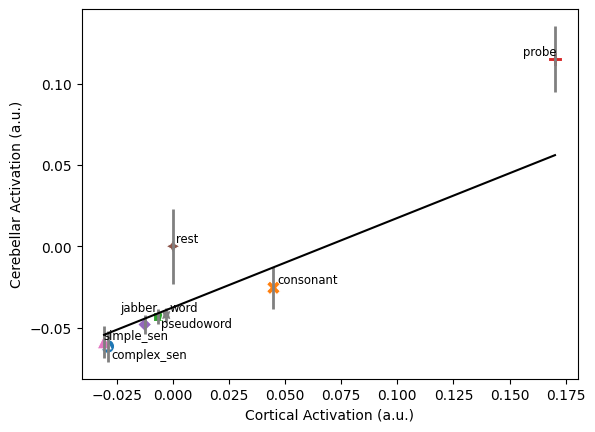

In [14]:
df_path = os.path.join(langdir, 'IBC/roi', "ROI_nettekoven(D1-D4).tsv")
df = pd.read_csv(df_path, sep="\t")
df1= df_clean(dataframe= df)

plotting.make_scatterplot(df1,split='cond_name', markers= True, labels= label_dict)

In [15]:
# need to pass 
print(AnovaRM(data=df1[df1.cond_name!='rest'], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
cond_name  4.7105 6.0000 66.0000 0.0005



# Connectivity model MDTB trained (across whole) 

In [16]:
# D = ss.get_summary_conn(dataset = "IBC", 
#                     ses_id = 'ses-rsvplanguage', 
#                     type = "CondHalf", 
#                     cerebellum_roi ='MDTB10', 
#                     cortex_roi = "Icosahedron-1002_Sym.32k",
#                     add_rest = True)
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(langdir + '/IBC/connectivity/ROI_MDTB10_conn.tsv',sep='\t')

/tmp/ipykernel_8090/3610494310.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_avaraged = dataframe.groupby(['sn', 'cond_name']).mean()


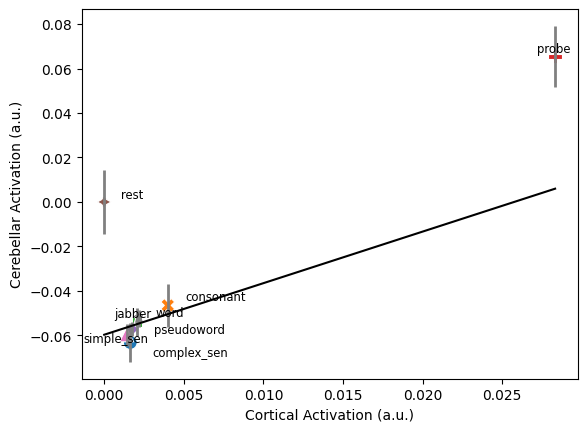

In [17]:
df_path = os.path.join(langdir, 'IBC/connectivity/', "ROI_MDTB10_conn.tsv")
df = pd.read_csv(df_path, sep="\t")
df1= df_clean(dataframe= df)

plotting.make_scatterplot(df1,split='cond_name', markers= True, labels= label_dict)

In [18]:
# need to pass 
print(AnovaRM(data=df1[df1.cond_name!='rest'], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
cond_name  5.7022 6.0000 66.0000 0.0001



# Language (connectivity: S1-S4) - MD (connectivity: D1-D4) SHIFT ANALYSIS

/home/ROBARTS/barafat/Documents/GitHub/selective_recruitment/scripts/script_roi_pairs_IBC.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_condall = df1_noprob.groupby(['sn', 'cond_name']).mean()
/home/ROBARTS/barafat/Documents/GitHub/selective_recruitment/scripts/script_roi_pairs_IBC.py:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_condall = df1_noprob.groupby(['sn', 'cond_name']).mean()


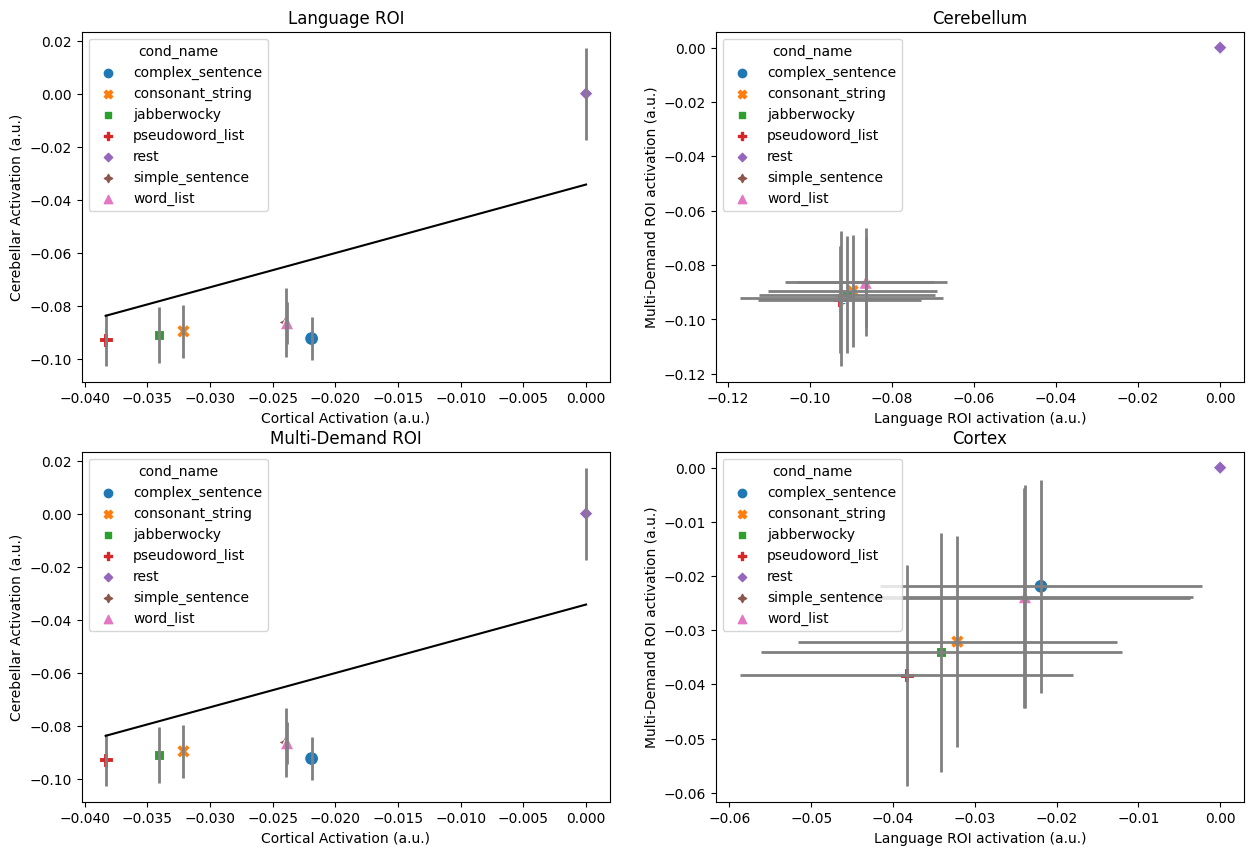

In [4]:
summary_1, summary_2= rp.get_summary_pair(dataset='IBC',ses_id = 'ses-rsvplanguage', type= 'CondHalf', roi_1='language(S1-S4)_NettekovenSym68c32',roi_2='md(D1-D4)_NettekovenSym68c32', add_rest= True)
figure =rp.plot_pair(dataframe_1=summary_1,dataframe_2=summary_2, markers= True)


# Language (connectivity: S1L-S4L) - MD (connectivity: D1-D4) SHIFT ANALYSIS

/tmp/ipykernel_14228/3610494310.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_avaraged = dataframe.groupby(['sn', 'cond_name']).mean()
/tmp/ipykernel_14228/3610494310.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_avaraged = dataframe.groupby(['sn', 'cond_name']).mean()


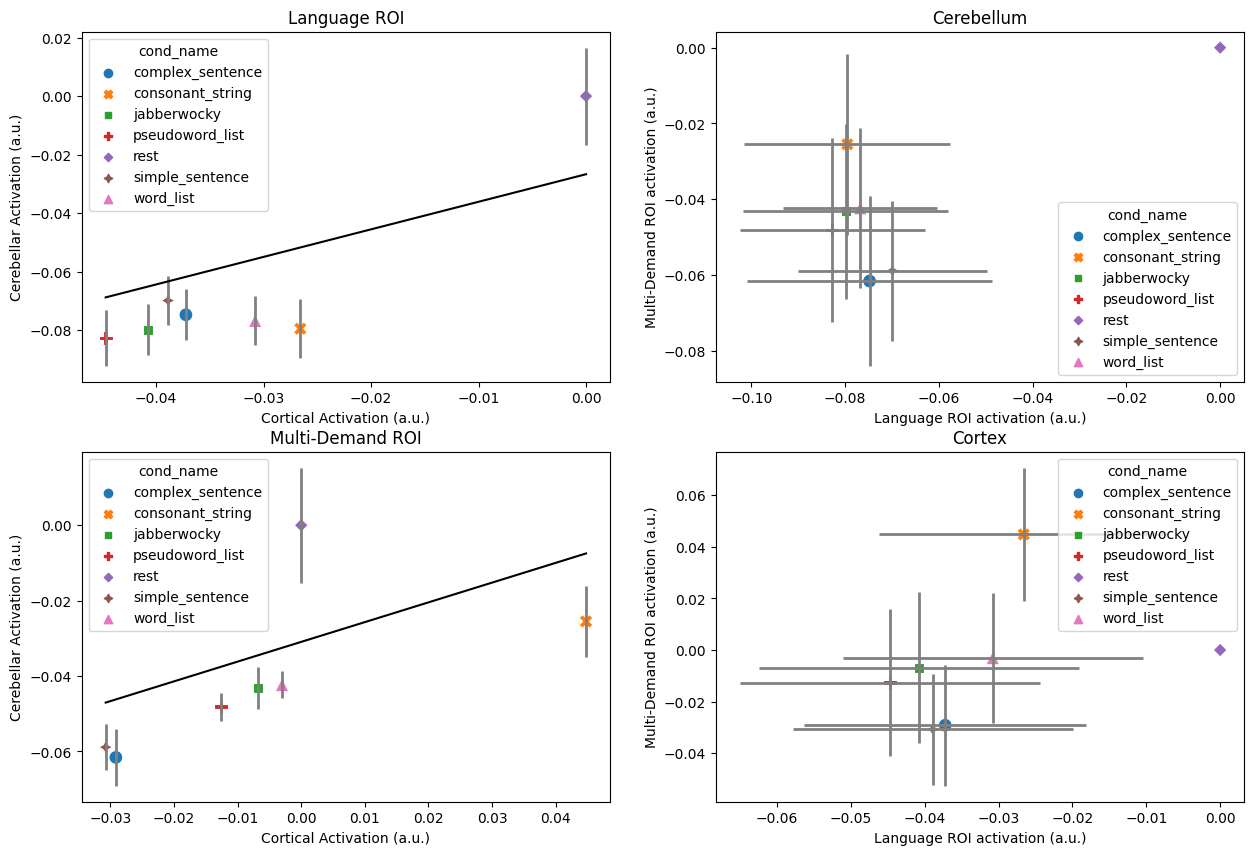

In [14]:
df1 = ra.get_summary(dataset= 'IBC', ses_id= 'ses-rsvplanguage',type='CondHalf', add_rest= True,
                            cerebellum_roi=f'tpl-SUIT/atl-language(S1R-S4R)_NettekovenSym68c32_space-SUIT', cortex_roi= f'tpl-fs32k/language(S1L-S4L)_NettekovenSym68c32.32k')
df1 = df1[df1['cond_name'] != 'probe']

df1= df_clean(dataframe= df1)

summary_1 = ra.run_regress(df = df1, fit_intercept= True)

df2 = ra.get_summary(dataset= 'IBC', ses_id= 'ses-rsvplanguage',type='CondHalf', add_rest= True,
                            cerebellum_roi=f'tpl-SUIT/atl-md(D1-D4)_NettekovenSym68c32_space-SUIT', cortex_roi= f'tpl-fs32k/md(D1-D4)_NettekovenSym68c32.32k')
df2 = df2[df2['cond_name'] != 'probe']

df2= df_clean(dataframe= df2)

summary_2 = ra.run_regress(df = df2, fit_intercept= True)

figure =rp.plot_pair(dataframe_1=summary_1,dataframe_2=summary_2, markers= True)




# Language (connectivity: S1-S4) - MD (connectivity: D1-D4) SHIFT ANALYSIS (on MDTB)

/home/ROBARTS/barafat/Documents/GitHub/selective_recruitment/recruite_ana.py:292: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['slope']=[0]*len(df)
/home/ROBARTS/barafat/Documents/GitHub/selective_recruitment/recruite_ana.py:293: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intercept']=[0]*len(df)
/home/ROBARTS/barafat/Documents/GitHub/selective_recruitment/recruite_ana.py:294: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

ValueError: 'x' and 'y' must have the same size

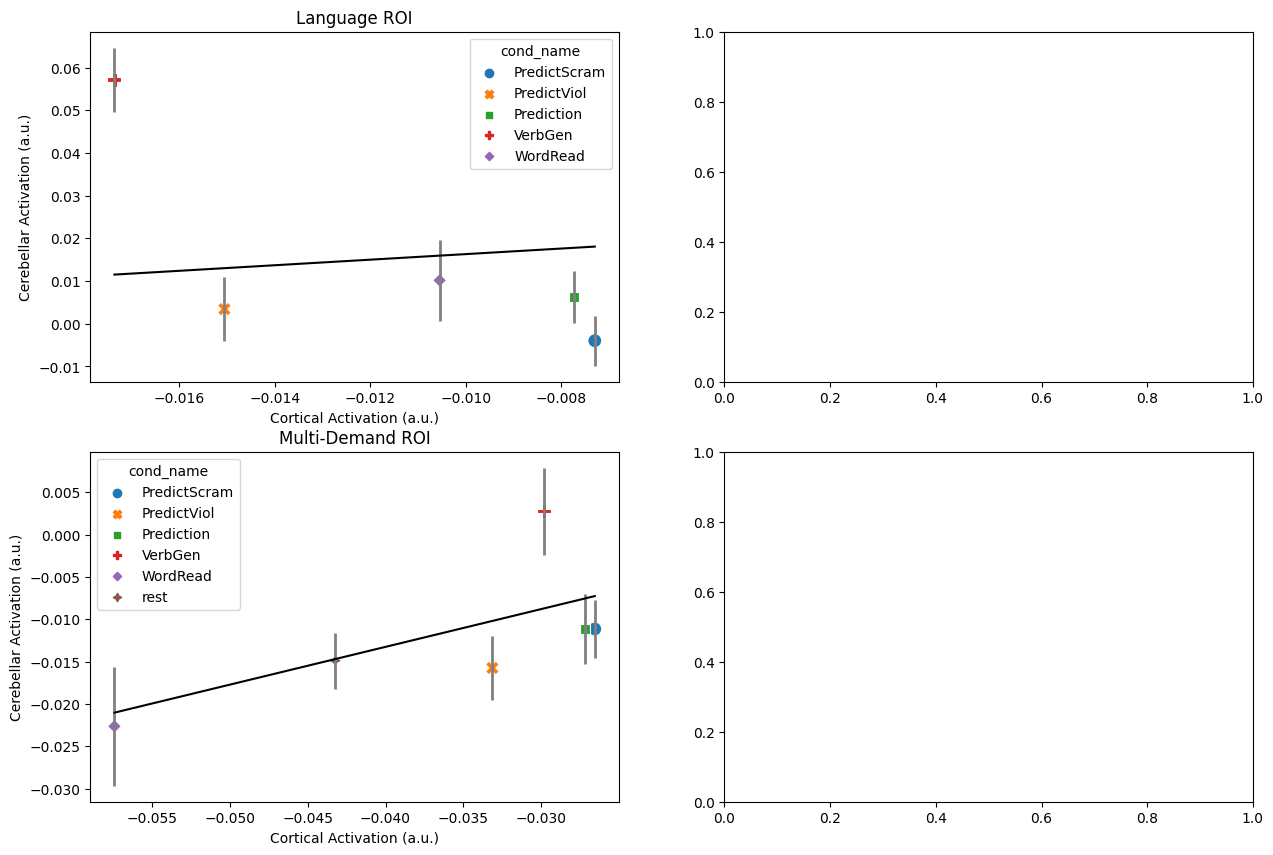

In [15]:
df1 = ra.get_summary(dataset= 'MDTB', ses_id= 'ses-S2',type='CondAll', add_rest= True,
                            cerebellum_roi=f'tpl-SUIT/atl-language(S1R-S4R)_NettekovenSym68c32_space-SUIT', cortex_roi= f'tpl-fs32k/language(S1L-S4L)_NettekovenSym68c32.32k')

conditions = ['Prediction','PredictViol','PredictScram','VerbGen','WordRead', ]
df1_filtered = df1[df1['cond_name'].isin(conditions)]

# Run regression for first dataframe
summary_1 = ra.run_regress(df=df1_filtered, fit_intercept= True)


df2 = ra.get_summary(dataset= 'MDTB', ses_id= 'ses-S2',type='CondAll', add_rest= True,
                            cerebellum_roi=f'tpl-SUIT/atl-md(D1-D4)_NettekovenSym68c32_space-SUIT', cortex_roi= f'tpl-fs32k/md(D1-D4)_NettekovenSym68c32.32k')

conditions = ['Prediction','PredictViol','PredictScram','VerbGen','WordRead', 'rest']
df2_filtered = df2[df2['cond_name'].isin(conditions)]

# Run regression for first dataframe
summary_2 = ra.run_regress(df=df2_filtered, fit_intercept= True)


figure =rp.plot_pair(dataframe_1=summary_1,dataframe_2=summary_2, markers= True)
